
# **Stellar Classification**
---



# Importing libraries

In [76]:
import pandas as pd
import numpy as np
import io
from google.colab import files

#data uploaded
uploaded = files.upload()
data = pd.read_csv('StarClassificationDataset.csv')

Saving StarClassificationDataset.csv to StarClassificationDataset (2).csv


<ipython-input-76-72a75897a1cb>:8: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('StarClassificationDataset.csv')


In [77]:
data.head()

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

<Axes: >

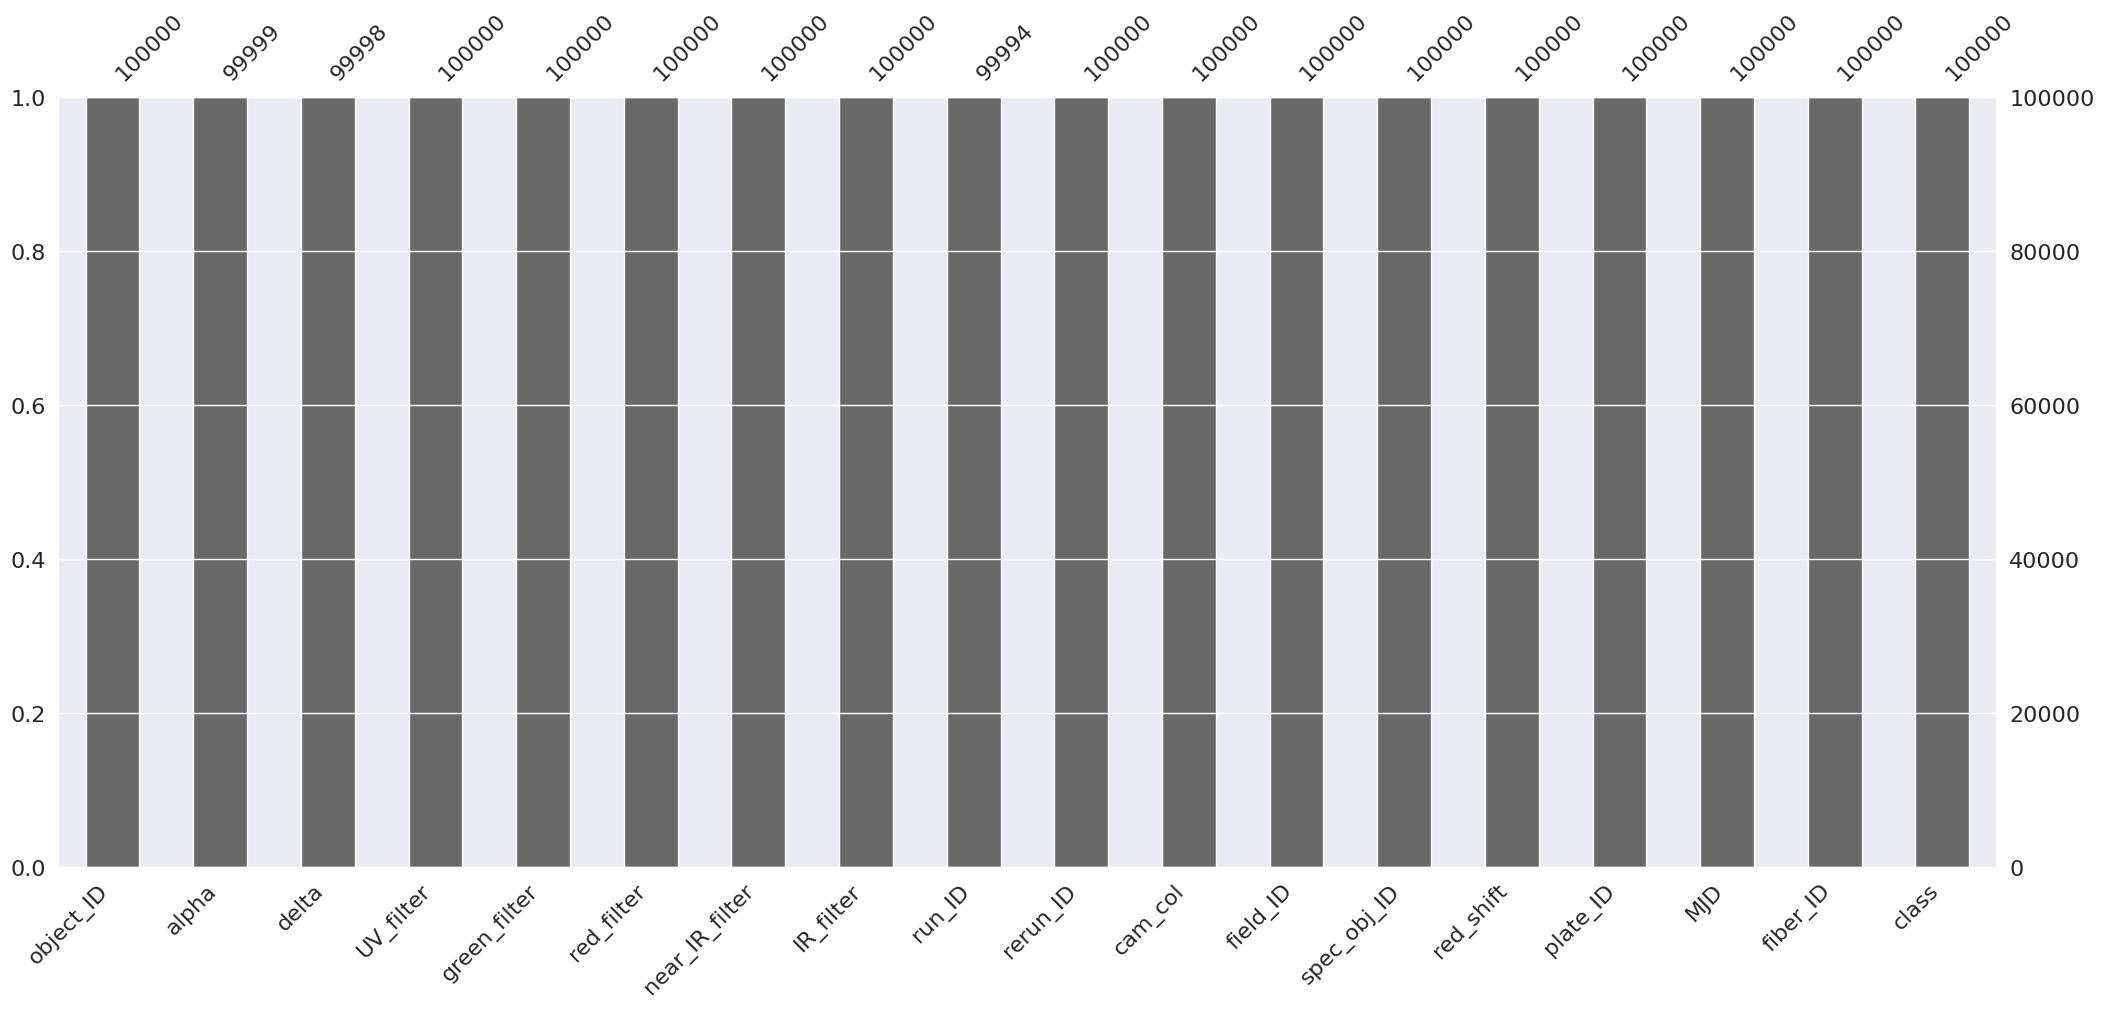

In [79]:
# bar plot for missing values
import missingno as ms
ms.bar(data)

In [80]:
data = data.drop(data.columns[[0,9]],axis=1)
data = data.drop(['spec_obj_ID'],axis=1)
data


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171,GALAXY
1,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427,GALAXY
2,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299,GALAXY
3,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775,GALAXY
4,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,3,137,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,0.455040,6751,56368,470,GALAXY


In [81]:
data.isnull().sum()

alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
cam_col           0
field_ID          0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [82]:
# delete duplicate rows
data.drop_duplicates()

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171,GALAXY
1,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427,GALAXY
2,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299,GALAXY
3,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775,GALAXY
4,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,3,137,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,0.455040,6751,56368,470,GALAXY


In [83]:
#Mean Imputation

cols = ['run_ID','alpha','delta']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

data['run_ID'] = data['run_ID'].fillna(data['run_ID'].mean())
data['alpha'] = data['alpha'].fillna(data['alpha'].median())
data['delta'] = data['delta'].fillna(data['delta'].std())
data

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,cam_col,field_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.000000,2,79,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.000000,5,119,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.000000,2,120,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.000000,3,214,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,4481.391627,3,137,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778.000000,2,581,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917.000000,1,289,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314.000000,4,308,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650.000000,4,131,0.455040,6751,56368,470,GALAXY


<Axes: >

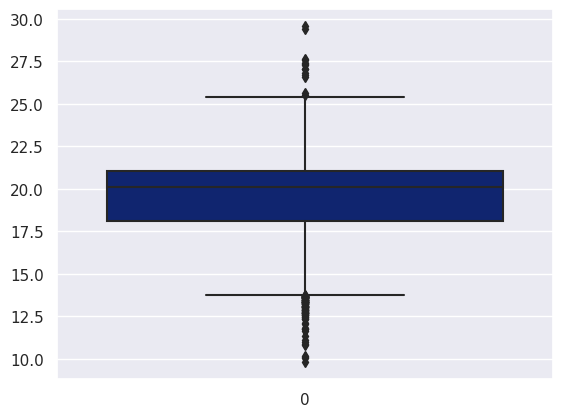

In [84]:
#outliers check
data.describe()
#Boc Plot
import seaborn as sns
sns.boxplot(data['red_filter'])


<Axes: >

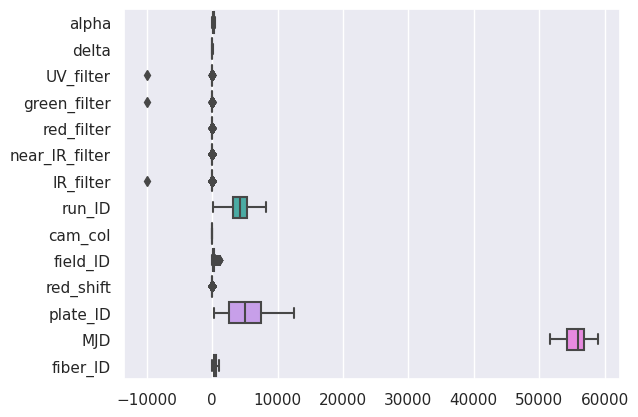

In [85]:
sns.boxplot(data,orient='h')

In [86]:
from scipy import stats
#Removing outliers Z-score
z_threshold=3
z_scores = np.abs(stats.zscore(data.iloc[:,:-1]))
# Create a mask to identify outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)
# Remove rows with outliers
data = data[~outlier_mask]
# Display the DataFrame with outliers removed
print(data)

            alpha      delta  UV_filter  green_filter  red_filter  \
0      135.689107  32.494632   23.87882      22.27530    20.39501   
1      144.826101  31.274185   24.77759      22.83188    22.58444   
2      142.188790  35.582444   25.26307      22.66389    20.60976   
3      338.741038  -0.402828   22.13682      23.77656    21.61162   
4      345.282593  21.183866   19.43718      17.58028    16.49747   
...           ...        ...        ...           ...         ...   
99995   39.620709  -2.594074   22.16759      22.97586    21.90404   
99996   29.493819  19.798874   22.69118      22.38628    20.45003   
99997  224.587407  15.700707   21.16916      19.26997    18.20428   
99998  212.268621  46.660365   25.35039      21.63757    19.91386   
99999  196.896053  49.464643   22.62171      21.79745    20.60115   

       near_IR_filter  IR_filter       run_ID  cam_col  field_ID  red_shift  \
0            19.16573   18.79371  3606.000000        2        79   0.634794   
1            

In [87]:
sns.set(style='darkgrid', palette='dark')

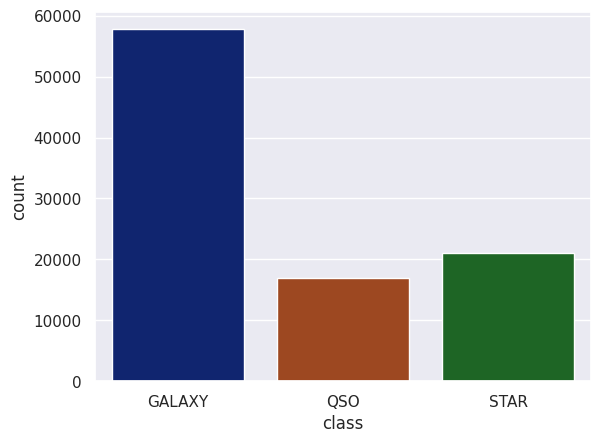

In [88]:
import matplotlib.pyplot as plt
sns.countplot(x = data['class'])
plt.show()

<ipython-input-89-f1a0901db085>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delta'], color="midnightblue")


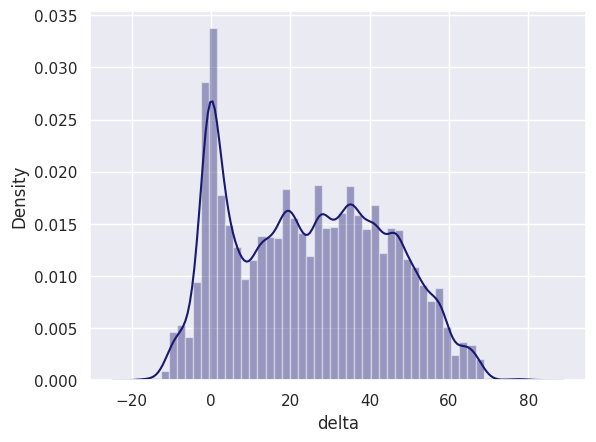

In [89]:
sns.distplot(data['delta'], color="midnightblue")
plt.show()

<ipython-input-90-90dd13cd5559>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.red_shift, color="midnightblue")


<Axes: xlabel='red_shift', ylabel='Density'>

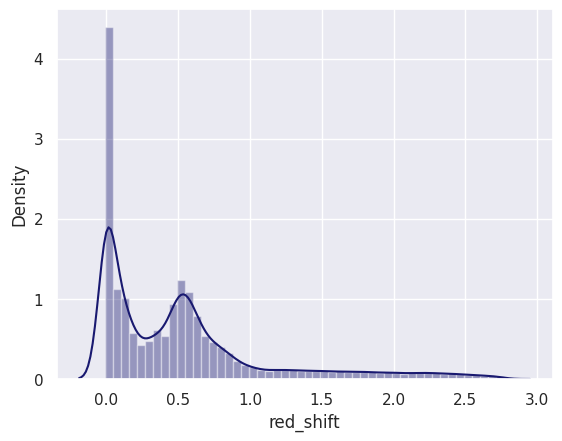

In [90]:
sns.distplot(data.red_shift, color="midnightblue")

<ipython-input-91-7f9f75a6e491>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.plate_ID, color="midnightblue")


<Axes: xlabel='plate_ID', ylabel='Density'>

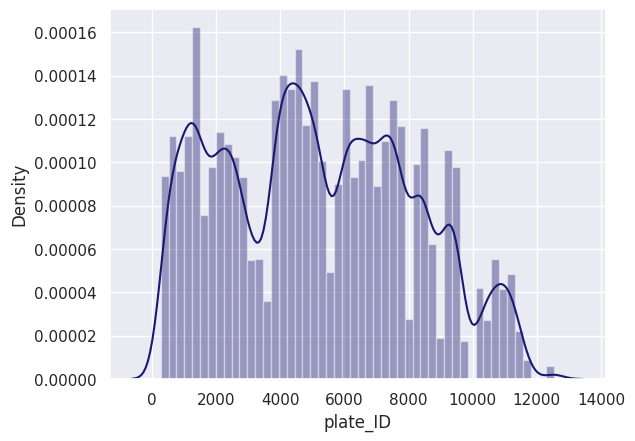

In [91]:
sns.distplot(data.plate_ID, color="midnightblue")

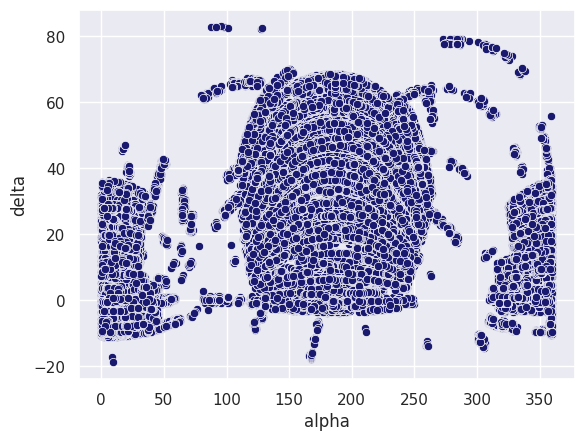

In [92]:
sns.scatterplot(x = data.alpha, y = data.delta, color="midnightblue")
plt.show()

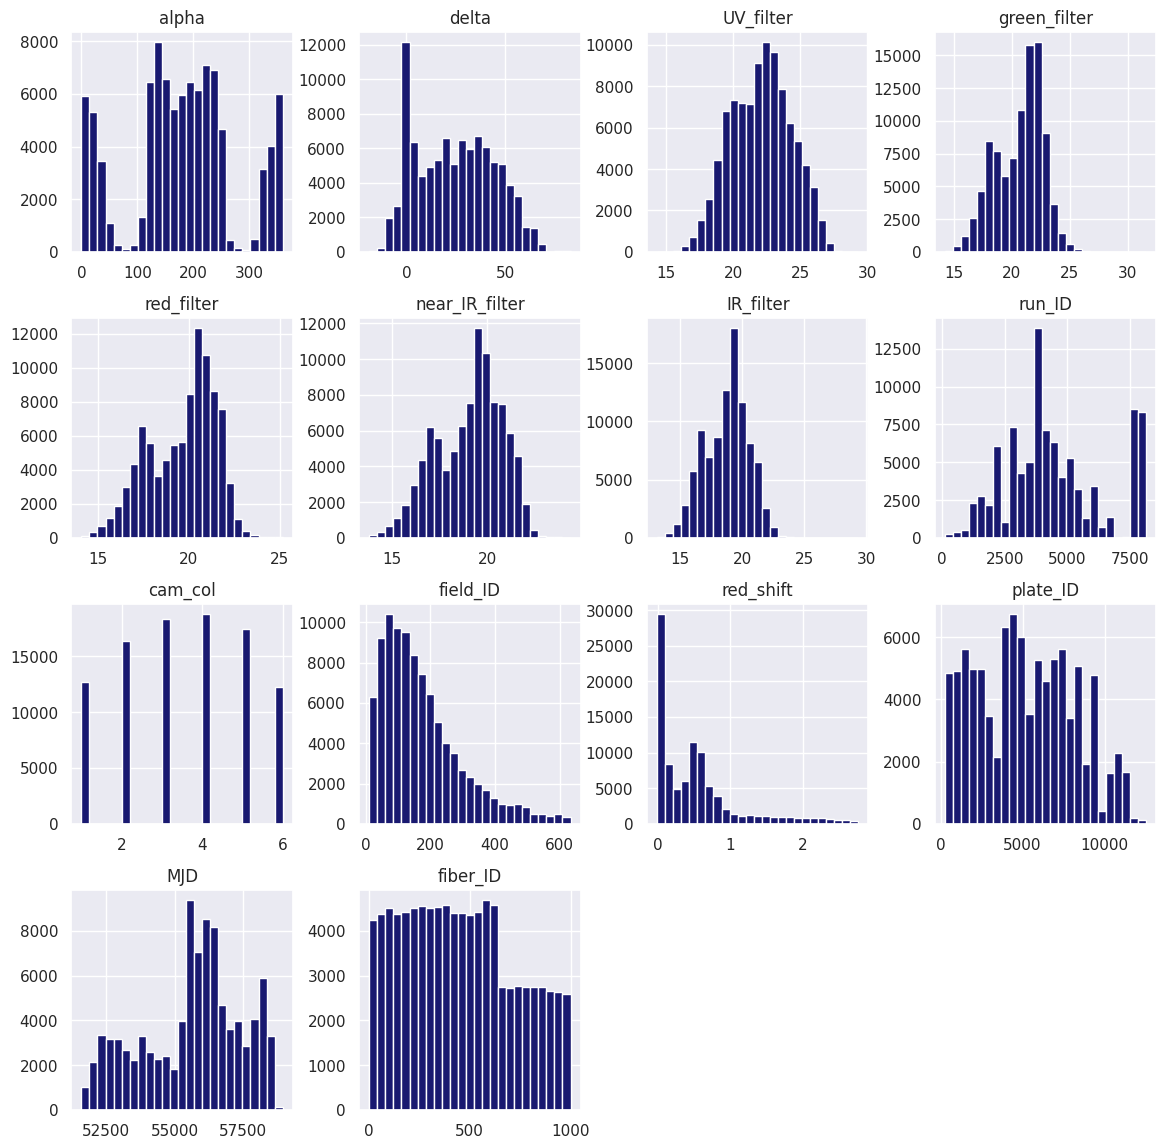

In [93]:
data.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

<ipython-input-94-8312a8ee39ce>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.iloc[:,0:15].corr(),annot=True)


<Axes: >

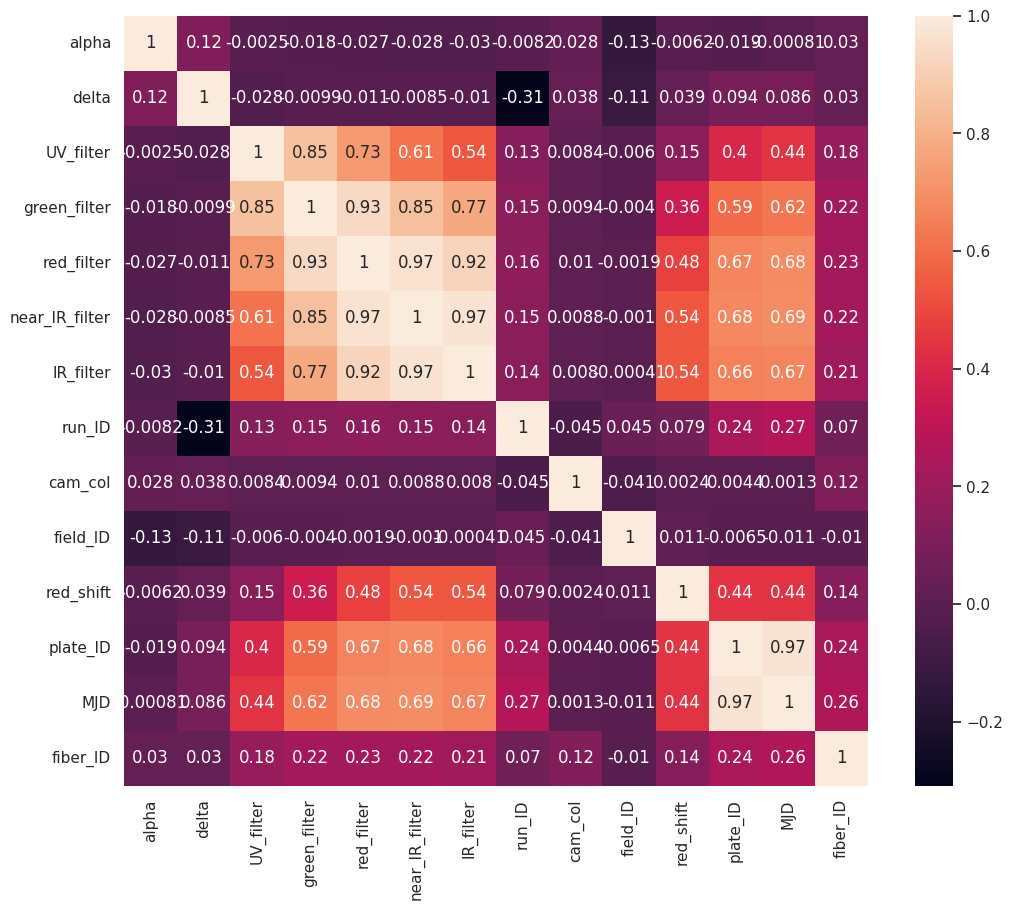

In [94]:
#Heatmap for expressing correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))  # Adjust width and height as needed
sns.heatmap(data.iloc[:,0:15].corr(),annot=True)

# Label encoding

In [95]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'].values)
data['class'].value_counts()

<ipython-input-95-1076f66552d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = LE.fit_transform(data['class'].values)


0    57765
2    21017
1    16975
Name: class, dtype: int64

In [96]:
X = data[['UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'red_shift', 'plate_ID']]
X

,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,plate_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [97]:
y = data['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 95757, dtype: int64

In [98]:
y.value_counts()

0    57765
2    21017
1    16975
Name: class, dtype: int64

# Resampling

In [99]:
# SMOTE (Synthetic Minority Over-sampling Technique) technique from the imblearn library, which is commonly used in machine learning for addressing class imbalance issues in datasets.
#  This technique helps in oversampling the minority class to balance the class distribution.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dt=scaler.fit_transform(X_res)
print(dt)

[[ 1.03808467  0.9394548   0.36980887 ... -0.13701109 -0.02411907
   0.12239349]
 [ 1.46716402  1.2314535   1.59542482 ...  1.47145877  0.17038797
   1.6566138 ]
 [ 1.69893571  1.14332087  0.49002327 ... -0.04887075 -0.01145099
  -0.28690853]
 ...
 [-1.33063568 -1.76777005 -1.85878603 ... -1.71077602 -0.87999292
  -1.0813386 ]
 [-1.74848667 -1.85235976 -1.76552144 ... -1.50451823 -0.87993311
  -0.99225912]
 [ 1.13528475  1.306817    0.80002469 ... -0.38686739 -0.87964078
  -0.96576708]]


In [101]:
y_res.value_counts()

0    57765
1    57765
2    57765
Name: class, dtype: int64

In [102]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
173290    2
173291    2
173292    2
173293    2
173294    2
Name: class, Length: 173295, dtype: int64

# Splitting dataset

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

# Classification Algorithms

In [104]:
# Creating the dataframe in which we'll store the accuracy scores of all the classification algorithms so we can choose the best one.
score_df = pd.DataFrame(columns=['Algorithm', 'Recall score','Precision'])

In [105]:
score_df

,Algorithm,Recall score,Precision


# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

from sklearn.metrics import recall_score
LR_recall = recall_score(y_test, y_pred1, average='weighted')
print(LR_recall)

from sklearn.metrics import precision_score
LR_prec=precision_score(y_test,y_pred1,average='weighted')
print(LR_prec)

from sklearn.metrics import f1_score
LR_f1score=f1_score(y_test,y_pred1,average='weighted')
print(LR_f1score)

0.9402178930846644
0.9403260839111719
0.9396920453156159


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
# Adding recall_score, precision_score, f_score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_recall,'Precision': LR_prec, 'F1 score':LR_f1score}, ignore_index = True)
score_df

<ipython-input-107-1b3300db8bc8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'LogisticRegression', 'Recall score': LR_recall,'Precision': LR_prec, 'F1 score':LR_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692


# K Nearest Neighbours

In [108]:
# Now, we'll create a dataframe where we'll store the recall score,precision of the K Neighbors Classifier algorithm with different values of n_neighbors
# Then, we'll choose the maximum one and consider that as the recall score,precision of the KNN algo. for further use
knn_df = pd.DataFrame(columns=['Neighbors','Recall score','Precision score'])

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_newrow= pd.DataFrame({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted'),
                              'Precision score': precision_score(y_test,y_pred2,average='weighted'),
                              'F1 score': f1_score(y_test,y_pred2,average='weighted')},index=[1])
    knn_df = pd.concat([knn_df, knn_newrow])

knn_df

,Neighbors,Recall score,Precision score,F1 score
1,1,0.929254,0.929069,0.929020
1,2,0.911366,0.914412,0.911515
1,3,0.914574,0.914418,0.914477
1,4,0.902894,0.904308,0.902868
1,5,0.900979,0.901160,0.900930
1,6,0.893546,0.895116,0.893529
1,7,0.890615,0.891006,0.890562
1,8,0.883090,0.884911,0.883007
1,9,0.881267,0.882068,0.881201
1,10,0.876604,0.878446,0.876422


In [110]:
knn_df = knn_df.sort_values(by='Recall score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,1,0.929254,0.929069,0.929020
1,3,0.914574,0.914418,0.914477
1,2,0.911366,0.914412,0.911515
1,4,0.902894,0.904308,0.902868
1,5,0.900979,0.901160,0.900930


In [111]:
knn_df = knn_df.sort_values(by='Precision score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,1,0.929254,0.929069,0.929020
1,3,0.914574,0.914418,0.914477
1,2,0.911366,0.914412,0.911515
1,4,0.902894,0.904308,0.902868
1,5,0.900979,0.901160,0.900930


In [112]:
knn_df = knn_df.sort_values(by='F1 score', ascending = False)
knn_df.head()

,Neighbors,Recall score,Precision score,F1 score
1,1,0.929254,0.929069,0.929020
1,3,0.914574,0.914418,0.914477
1,2,0.911366,0.914412,0.911515
1,4,0.902894,0.904308,0.902868
1,5,0.900979,0.901160,0.900930


In [113]:
# From the above code cell, we can see that n_neighbors = 1 has the highest accuracy score out of all the values in the dataframe.
# So, for the final accuracy score of the KNN algo, we'll keep n_neighbors = 1.

In [114]:
# KNN algo for n_neighbors = 1

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_recall = recall_score(y_test, y_pred2, average='weighted')
print(knn_recall)

from sklearn.metrics import precision_score
knn_prec = precision_score(y_test, y_pred2, average='weighted')
print(knn_prec)

from sklearn.metrics import f1_score
knn_f1score = f1_score(y_test,y_pred2,average='weighted')
print(knn_f1score)

0.9292539931677593
0.9290689699744636
0.929020194958131


In [115]:
# Adding score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_recall,'Precision': knn_prec, 'F1 score':knn_f1score}, ignore_index = True)
score_df

<ipython-input-115-cdb7dda0a085>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_recall,'Precision': knn_prec, 'F1 score':knn_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020


# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

dtree_recall = recall_score(y_test, y_pred3, average='weighted')
print(dtree_recall)

dtree_prec = precision_score(y_test, y_pred3, average='weighted')
print(dtree_prec)

dtree_f1score = f1_score(y_test, y_pred3, average='weighted')
print(dtree_f1score)

0.969901209491275
0.9698959719322741
0.9698962413141546


In [117]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_recall,'Precision':dtree_prec, 'F1 score':dtree_f1score}, ignore_index = True)
score_df

<ipython-input-117-0d20b99b5f1d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_recall,'Precision':dtree_prec, 'F1 score':dtree_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
2,Decision Tree,0.969901,0.969896,0.969896


# Gaussian Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
print(gnb_score)

gnb_prec = precision_score(y_test, y_pred4, average = 'weighted')
print(gnb_prec)

gnb_f1score = f1_score(y_test, y_pred4, average = 'weighted')
print(gnb_f1score)

0.8030421937032591
0.8045173208862348
0.7971293617452139


In [119]:
# Adding score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score,'Precision': gnb_prec, 'F1 score':gnb_f1score}, ignore_index = True)
score_df

<ipython-input-119-4cbcaaa1e290>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score,'Precision': gnb_prec, 'F1 score':gnb_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
2,Decision Tree,0.969901,0.969896,0.969896
3,GaussianNB,0.803042,0.804517,0.797129


# Random Forest

In [120]:
# Now, we'll create a dataframe where we'll store the recall score of the Random Forest Classifier algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

rf_df = pd.DataFrame(columns=['Estimators','Recall score','Precision'])

In [121]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,21):
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_newrow=pd.DataFrame({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted'),
                            'Precision': precision_score(y_test, y_pred5, average = 'weighted'),
                            'F1 score': f1_score(y_test, y_pred5, average = 'weighted')},index=[1])
    rf_df = pd.concat([rf_df,rf_newrow])

rf_df

,Estimators,Recall score,Precision,F1 score
1,1,0.963461,0.963454,0.963456
1,2,0.966324,0.967370,0.966388
1,3,0.975579,0.975560,0.975565
1,4,0.976249,0.976489,0.976242
1,5,0.977472,0.977464,0.977457
1,6,0.978603,0.978737,0.978592
1,7,0.978903,0.978913,0.978888
1,8,0.978788,0.978903,0.978777
1,9,0.979434,0.979446,0.979421
1,10,0.979434,0.979527,0.979424


In [122]:
rf_df = rf_df.sort_values(by='Recall score', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,15,0.980473,0.980497,0.980460
1,20,0.980357,0.980420,0.980344
1,17,0.980357,0.980394,0.980344
1,16,0.980288,0.980361,0.980276
1,18,0.980219,0.980291,0.980206


In [123]:
rf_df = rf_df.sort_values(by='Precision', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,15,0.980473,0.980497,0.980460
1,20,0.980357,0.980420,0.980344
1,17,0.980357,0.980394,0.980344
1,16,0.980288,0.980361,0.980276
1,18,0.980219,0.980291,0.980206


In [124]:
rf_df = rf_df.sort_values(by='F1 score', ascending = False)
rf_df.head()

,Estimators,Recall score,Precision,F1 score
1,15,0.980473,0.980497,0.980460
1,20,0.980357,0.980420,0.980344
1,17,0.980357,0.980394,0.980344
1,16,0.980288,0.980361,0.980276
1,18,0.980219,0.980291,0.980206


In [125]:
# From the above code cell, we can see that n_estimators = 15 has the highest recall score and precision out of all the values in the dataframe.
# So, for the final recall score of the Random Forest Classifier algo, we'll keep n_estimators = 15.

In [126]:
# Random Forest algo for n_estimators = 1
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 15, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

from sklearn.metrics import recall_score
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
print(rf_score)

from sklearn.metrics import precision_score
rf_prec = precision_score(y_test, y_pred5, average = 'weighted')
print(rf_prec)

from sklearn.metrics import f1_score
rf_f1score = f1_score(y_test, y_pred5, average = 'weighted')
print(rf_f1score)

0.9804727172006278
0.9804970341190457
0.9804604671524217


In [127]:
# Adding accuracy score of the algo to the dataframe
score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score,'Precision': rf_prec, 'F1 score':rf_f1score}, ignore_index = True)
score_df

<ipython-input-127-b3c2d1135822>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score,'Precision': rf_prec, 'F1 score':rf_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
2,Decision Tree,0.969901,0.969896,0.969896
3,GaussianNB,0.803042,0.804517,0.797129
4,Random Forest,0.980473,0.980497,0.980460


# XGBoost (Extreme Gradient Boosting)

In [128]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

from sklearn.metrics import recall_score
xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
print(xgb_score)

from sklearn.metrics import precision_score
xgb_prec =precision_score(y_test, y_pred6, average = 'weighted')
print(xgb_prec)

from sklearn.metrics import f1_score
xgb_f1score = f1_score(y_test, y_pred6, average = 'weighted')
print(xgb_f1score)

0.9788339026867325
0.9788983929347119
0.9788294119625232


In [129]:
# Adding recall score to the dataframe
score_df = score_df.append({'Algorithm':'XGBoost', 'Recall score':xgb_score,'Precision': xgb_prec, 'F1 score':xgb_f1score}, ignore_index = True)
score_df

<ipython-input-129-db16324c8de8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'XGBoost', 'Recall score':xgb_score,'Precision': xgb_prec, 'F1 score':xgb_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
2,Decision Tree,0.969901,0.969896,0.969896
3,GaussianNB,0.803042,0.804517,0.797129
4,Random Forest,0.980473,0.980497,0.980460
5,XGBoost,0.978834,0.978898,0.978829


In [130]:
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Create the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))  # Output layer for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred8 = model.predict(X_test)
y_pred_classes = y_pred8.argmax(axis=-1)  # Convert predicted probabilities to classes

Epoch 1/20
4062/4062 [==============================] - 12s 3ms/step - loss: 9.9794 - accuracy: 0.4382 - val_loss: 3.6402 - val_accuracy: 0.3916
Epoch 2/20
4062/4062 [==============================] - 10s 3ms/step - loss: 2.3691 - accuracy: 0.6027 - val_loss: 0.8891 - val_accuracy: 0.6167
Epoch 3/20
4062/4062 [==============================] - 11s 3ms/step - loss: 1.1791 - accuracy: 0.7098 - val_loss: 1.9555 - val_accuracy: 0.6501
Epoch 4/20
4062/4062 [==============================] - 12s 3ms/step - loss: 0.7133 - accuracy: 0.7907 - val_loss: 0.2742 - val_accuracy: 0.9152
Epoch 5/20
4062/4062 [==============================] - 11s 3ms/step - loss: 0.4560 - accuracy: 0.8453 - val_loss: 0.3273 - val_accuracy: 0.8890
Epoch 6/20
4062/4062 [==============================] - 10s 2ms/step - loss: 0.3870 - accuracy: 0.8588 - val_loss: 0.2782 - val_accuracy: 0.9095
Epoch 7/20
4062/4062 [==============================] - 10s 2ms/step - loss: 0.3438 - accuracy: 0.8676 - val_loss: 0.2508 - val_ac

# ANN

In [131]:
# Compute recall score for each class
from sklearn.metrics import recall_score
ann_score = recall_score(y_test, y_pred_classes, average='weighted')
print(ann_score)

from sklearn.metrics import precision_score
ann_prec=precision_score(y_test, y_pred_classes, average='weighted')
print(ann_prec)

from sklearn.metrics import f1_score
ann_f1score=f1_score(y_test, y_pred_classes, average='weighted')
print(ann_f1score)

#epochs= 10 batch=32 78.90
#epochs= 20 batch=32 95.164 92.49 93.92 94.49
#epochs= 20 batch=64 94.77

0.9517819222601791
0.9521500655916264
0.9516441400707698


In [132]:
score_df = score_df.append({'Algorithm':'ANN', 'Recall score': ann_score,'Precision': ann_prec,'F1 score':ann_f1score}, ignore_index = True)
score_df

<ipython-input-132-482bd671d064>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Algorithm':'ANN', 'Recall score': ann_score,'Precision': ann_prec,'F1 score':ann_f1score}, ignore_index = True)


,Algorithm,Recall score,Precision,F1 score
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
2,Decision Tree,0.969901,0.969896,0.969896
3,GaussianNB,0.803042,0.804517,0.797129
4,Random Forest,0.980473,0.980497,0.980460
5,XGBoost,0.978834,0.978898,0.978829
6,ANN,0.951782,0.952150,0.951644


# Top Performing Model

In [133]:
score_df1 = score_df.set_index('Recall score')
score_df1

,Algorithm,Precision,F1 score
Recall score,,,
0.940218,LogisticRegression,0.940326,0.939692
0.929254,KNN,0.929069,0.929020
0.969901,Decision Tree,0.969896,0.969896
0.803042,GaussianNB,0.804517,0.797129
0.980473,Random Forest,0.980497,0.980460
0.978834,XGBoost,0.978898,0.978829
0.951782,ANN,0.952150,0.951644


In [134]:
score_df1 = score_df1.sort_values(by = 'Recall score', ascending = False)
score_df1

,Algorithm,Precision,F1 score
Recall score,,,
0.980473,Random Forest,0.980497,0.980460
0.978834,XGBoost,0.978898,0.978829
0.969901,Decision Tree,0.969896,0.969896
0.951782,ANN,0.952150,0.951644
0.940218,LogisticRegression,0.940326,0.939692
0.929254,KNN,0.929069,0.929020
0.803042,GaussianNB,0.804517,0.797129


In [135]:
# score_df = score_df.set_index('Precision')
# score_df

In [136]:
score_df = score_df.sort_values(by = 'Precision', ascending = False)
score_df

,Algorithm,Recall score,Precision,F1 score
4,Random Forest,0.980473,0.980497,0.980460
5,XGBoost,0.978834,0.978898,0.978829
2,Decision Tree,0.969901,0.969896,0.969896
6,ANN,0.951782,0.952150,0.951644
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
3,GaussianNB,0.803042,0.804517,0.797129


In [137]:
# score_df = score_df.set_index('F1 score')
# score_df

In [138]:
score_df = score_df.sort_values(by = 'F1 score', ascending = False)
score_df

,Algorithm,Recall score,Precision,F1 score
4,Random Forest,0.980473,0.980497,0.980460
5,XGBoost,0.978834,0.978898,0.978829
2,Decision Tree,0.969901,0.969896,0.969896
6,ANN,0.951782,0.952150,0.951644
0,LogisticRegression,0.940218,0.940326,0.939692
1,KNN,0.929254,0.929069,0.929020
3,GaussianNB,0.803042,0.804517,0.797129


In [139]:
#Random forest accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9804727172006278

In [140]:
#So according to all three parameters: RANDOM FOREST IS TOP PERFORMING MODEL

# Data Visualisation

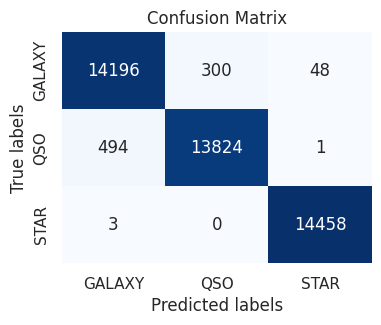

In [141]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
class_names=['GALAXY','QSO','STAR']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

<Axes: xlabel='Algorithm'>

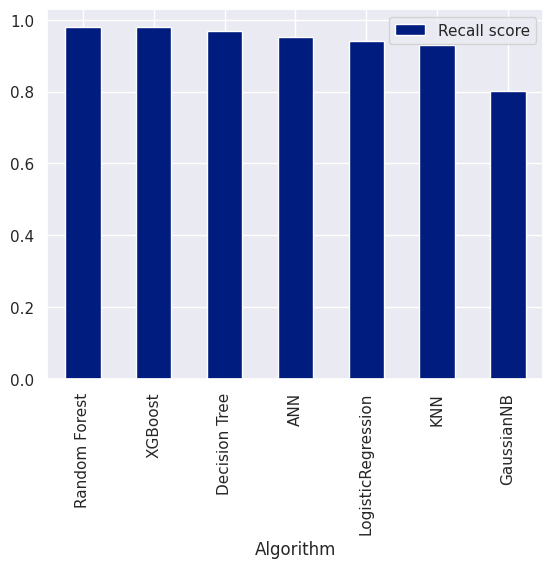

In [142]:
score_df.plot(x="Algorithm", y="Recall score", kind="bar")

<Axes: xlabel='Algorithm'>

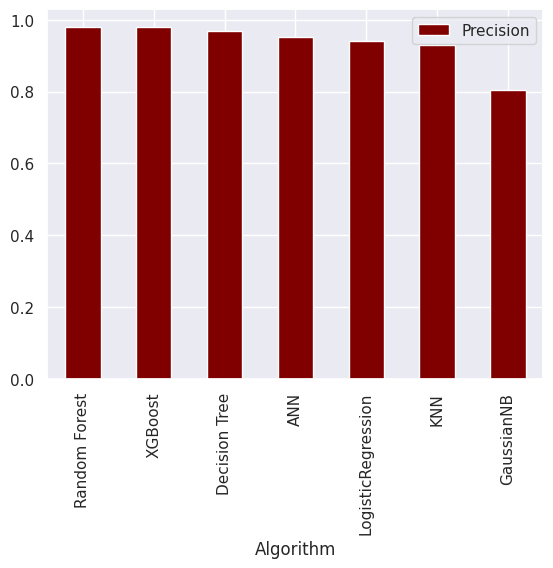

In [143]:
score_df.plot(x="Algorithm", y="Precision", kind="bar",color="maroon")

<Axes: xlabel='Algorithm'>

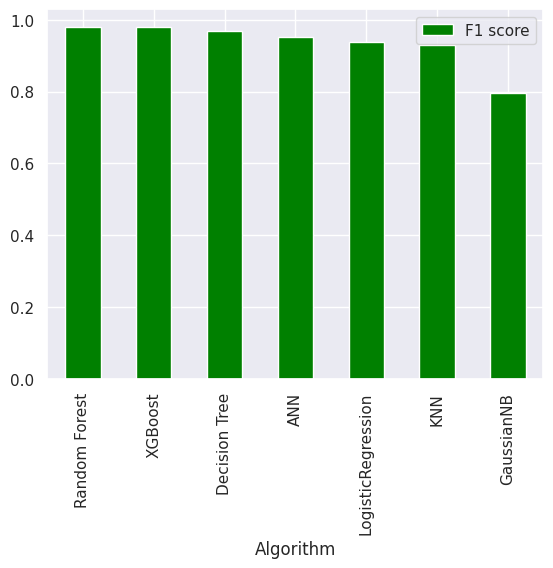

In [144]:
score_df.plot(x="Algorithm", y="F1 score", kind="bar",color="green")

<Axes: xlabel='Algorithm'>

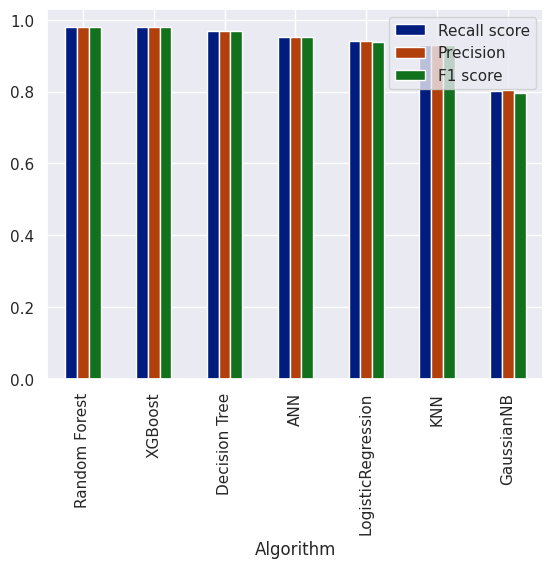

In [145]:
import pandas as pd
import matplotlib.pyplot as plot
score_df.plot(x="Algorithm", y=["Recall score", "Precision","F1 score"], kind="bar")

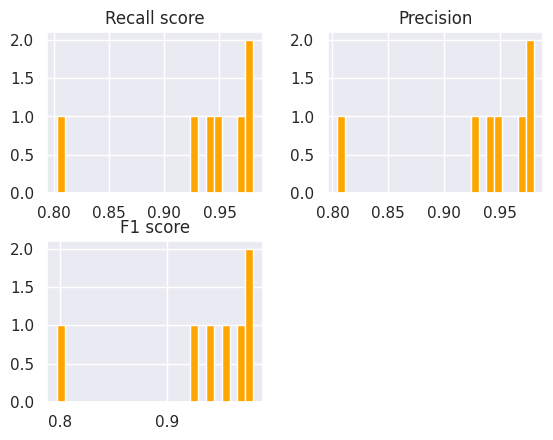

In [146]:
score_df.hist(bins =25, color="orange")
plt.show()

<Axes: >

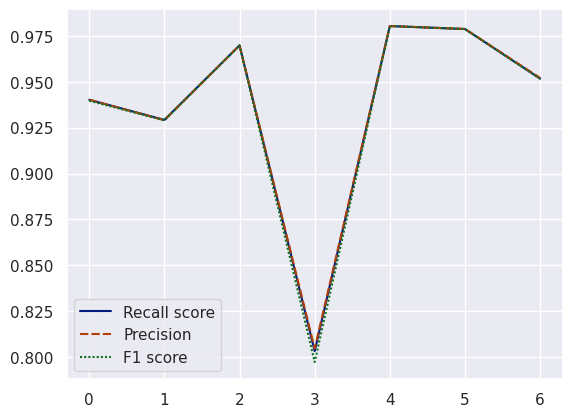

In [147]:
import seaborn as sns
sns.lineplot(data=score_df)